In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft
import math
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from onesidedcoupling import OnesidedCoupling

In [31]:
k_up = np.arange(0.05,0.25, 0.001)
alph = np.arange(0.01,0.5, 0.01)
print(k_up[16], alph[14])
print(k_up[10], alph[24])

0.06600000000000002 0.15
0.06000000000000001 0.25


In [6]:
def approx(listofnum, tol):
     mean = np.mean(listofnum)
     boolean = [abs(i - mean) / mean * 100 for i in listofnum]
     
     for num in boolean:
          if num > tol:
               return math.nan
          else:
               return mean

In [ ]:
# [[14, 80], [24, 50], [37, 18], [38, 16]]

In [37]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 500, t_step)
keep = int(t_last / t_step)
k = k_up[80]
gamma = 0.2
mu = 2
beta = 0.5
alpha = alph[14]

[1.33716249 1.3371619  1.33716129 1.33716066 1.33716001 1.33715934
 1.33715865 1.33715794 1.33715722 1.33715647]


(-3.5, 3.5)

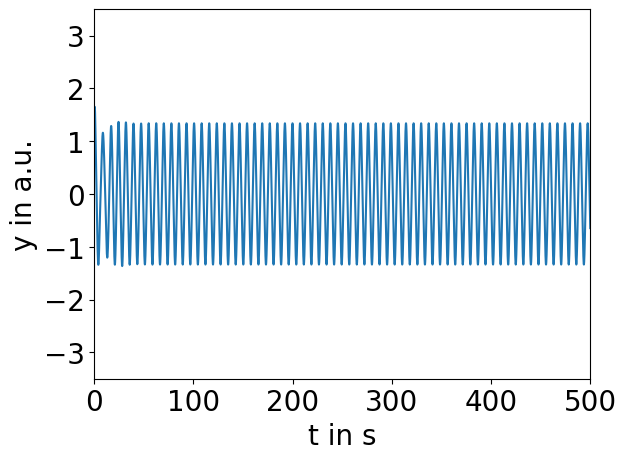

In [38]:
p = 1,1.4,1.4,1
amplitudes = OnesidedCoupling(p, t, keep, k, mu, gamma, alpha, beta).peak()[1][1]['peak_heights'][-10:]
print(amplitudes)
plt.plot(t, OnesidedCoupling(p,  t, keep, k,mu, gamma, alpha, beta).y_solv())
plt.xlabel("t in s", fontsize = 20)
plt.ylabel("y in a.u.", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim([0, 500])
plt.ylim([-3.5, 3.5])